In [1]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the Titanic dataset from kaggle
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## Missing values of 'Age' can be replaced with median value as it is a numerical column
df['Age'] = df['Age'].fillna(df['Age'].median())

## 'Cabin' can be dropped as it have too many missing values

df = df.drop(columns=['Cabin'],axis=1)

## Missing values of 'Embarked' can be replaced with mode as it a categorical column

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
## Converting categorical variables like 'Sex' , 'Embarked' to numeric type for easier analysis

df['Sex'] = df['Sex'].map({'male':1 , 'female':0})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [8]:
## Feature engineering
## Creating a new feature as 'FamilySize' which includes 'Parch','SibSp' and the person himself

df['FamilySize'] = df['SibSp'] + df['Parch'] +1
df = df.drop(columns=['SibSp','Parch'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,2,1


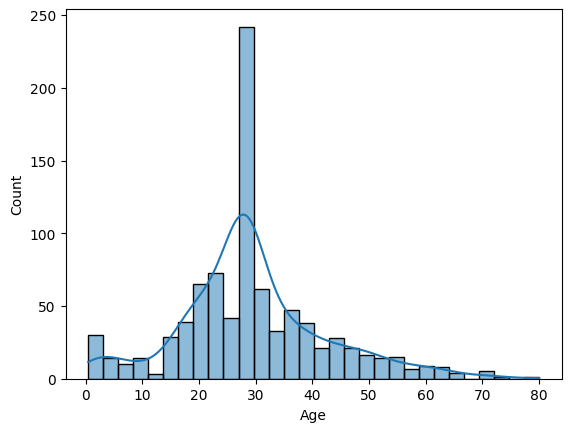

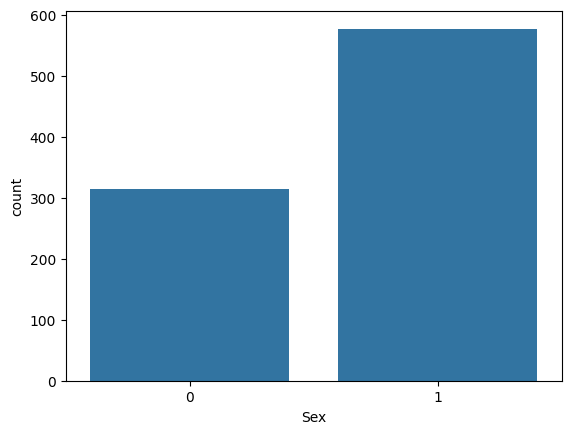

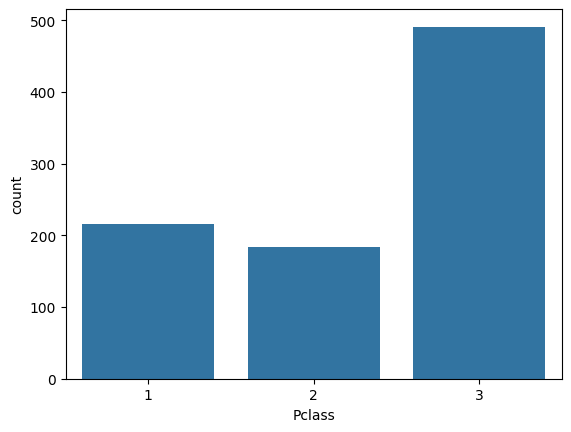

In [9]:
## Checking for age distribution
sns.histplot(df['Age'],kde=True)
plt.show()

## Checking for Gender distribution
sns.countplot(x='Sex',data=df)
plt.show()

## Checking for Pclass distribution
sns.countplot(x='Pclass',data=df)
plt.show()

 Hence it can be seen that maximum population was between the age group 20-40 years.
 Also, the number of males was nearly double the number of females.
 Maximum passangers were having class 3 tickets.

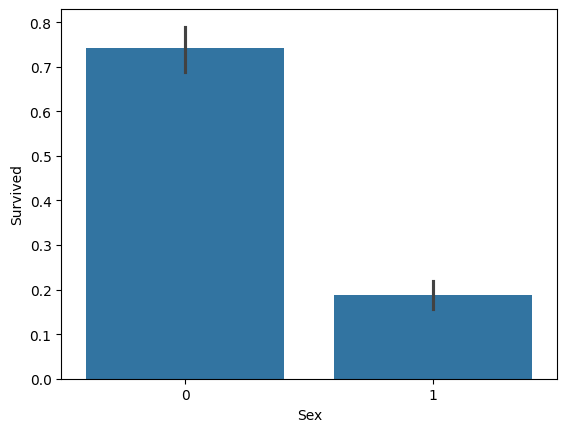

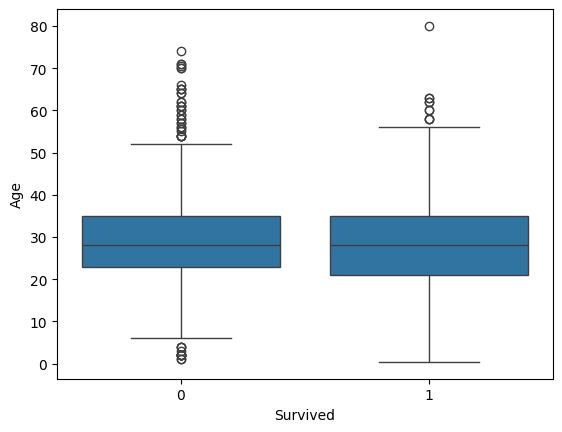

In [10]:
## Checking the relationship between 'Sex' and 'Survived' , 'Age' and 'Survived'
sns.barplot(x='Sex',y='Survived',data=df)
plt.show()

sns.boxplot(x='Survived',y='Age',data=df)
plt.show()

Hence it can be seen that the number of females survived was more than the number of males survived.
The IQR range and median value for both survived and not-survived are same, which indicates that age alone was not a major factor in deciding whether they survived or not. However, the higher number of outliers in the not-survived group indicates that slightly higher aged people died more. 

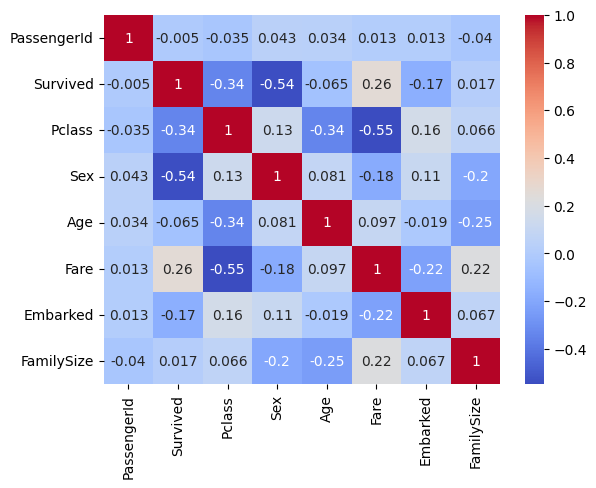

In [12]:
## Checking the correlation between all the numerical variables for identifying relationship between them
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<h3><u>Survived vs Sex (-0.54):</u></h3>
-There is a strong negative correlation between Survived and Sex, indicating that males (Sex=1) were less likely to survive compared to females (Sex=0). This is expected, as women were given priority during the Titanic evacuation.
<h3><u>Survived vs Pclass (-0.34):</u></h3>

There is a moderate negative correlation between Survived and Pclass, suggesting that passengers in lower classes (higher Pclass number, like 3rd class) were less likely to survive. Conversely, those in higher classes (1st class) had a better chance of survival.
<h3><u>Survived vs Fare (0.26):</u></h3>

There is a positive correlation between Survived and Fare, meaning passengers who paid higher fares were more likely to survive. This aligns with the correlation between Survived and Pclass since wealthier passengers (who paid higher fares) were often in higher classes.
<h3><u>Pclass vs Fare (-0.55):</u></h3>

A strong negative correlation exists between Pclass and Fare, which makes sense because higher-class tickets (1st class) were more expensive.
<h3><u>FamilySize vs Fare (0.22):</u></h3>

There’s a slight positive correlation between FamilySize and Fare, suggesting that larger families might have paid more in total fare, likely due to booking multiple tickets together.
<h3><u>Age vs Pclass (-0.34):</u></h3>

A moderate negative correlation between Age and Pclass suggests that older passengers were more likely to be in higher classes, whereas younger passengers were more common in lower classes.

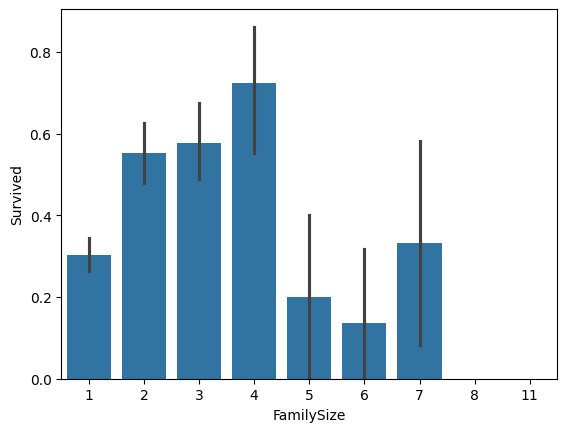

In [14]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.show()

It can be seen that maximum of the people having family size 4 have died. The number of deaths for family size greater than 4 is less as compared to lesser than or equal to 4.

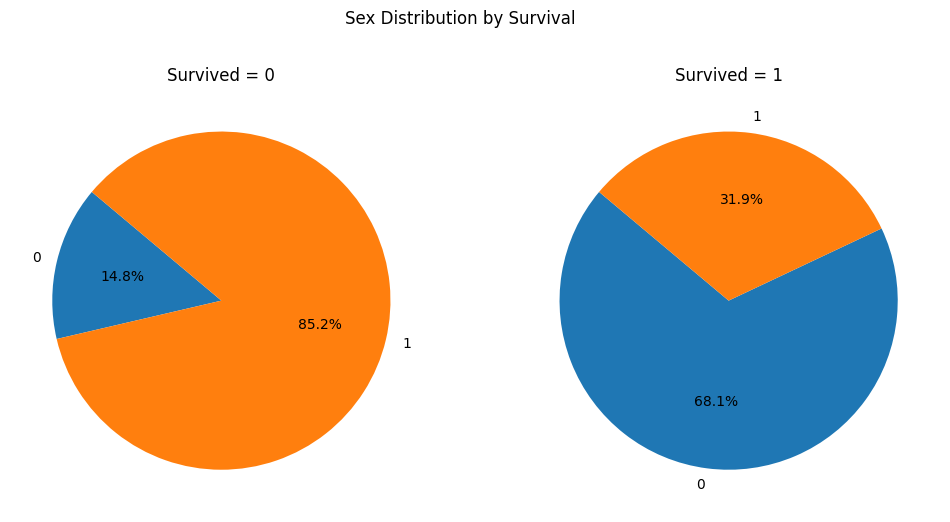

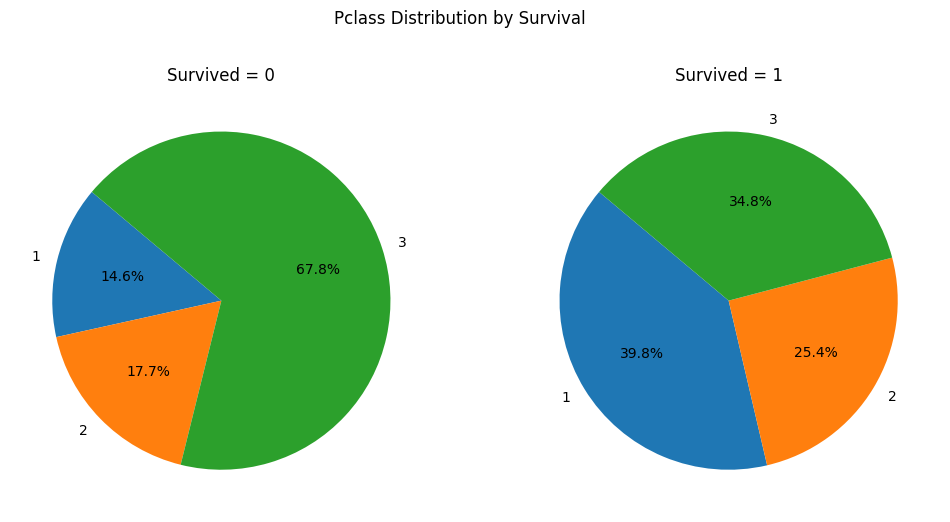

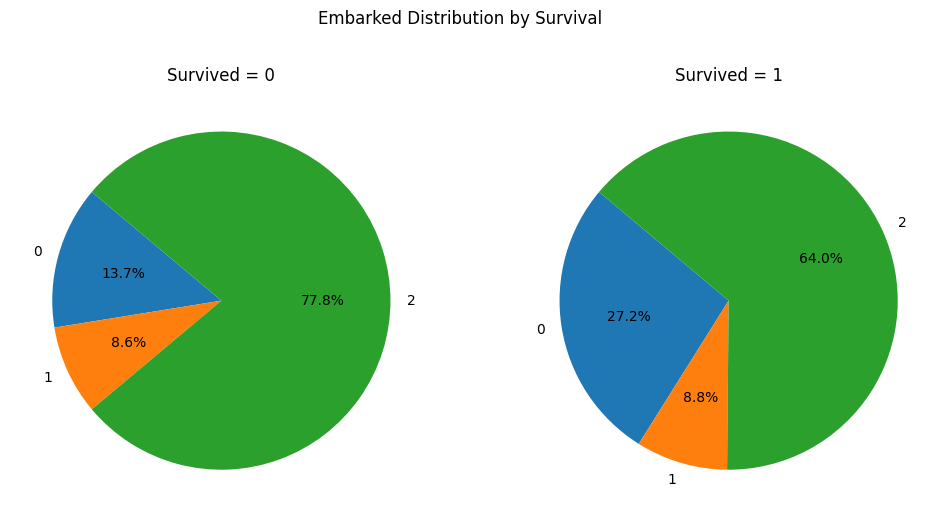

In [15]:
## Pie Chart for every categorical variable grouped by 'Survived'
def plot_pie_charts(df, categorical_columns):
    for column in categorical_columns:
        survived_counts = df.groupby([column, 'Survived']).size().unstack()
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f'{column} Distribution by Survival')
        
        for i, survived in enumerate(survived_counts.columns):
            axes[i].pie(survived_counts[survived].dropna(), labels=survived_counts[survived].dropna().index, 
                        autopct='%1.1f%%', startangle=140)
            axes[i].set_title(f'Survived = {survived}')
        
        plt.show()
categorical_columns = ['Sex', 'Pclass', 'Embarked']
plot_pie_charts(df, categorical_columns)